# Machine Learning Assignment 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import balanced_accuracy_score

## Data Preparation

In this stage we will fix any errors that occured when reading the dataset, which include misclassification of data types.

In addition, we will prune the dataset of any irrelevant features, and separate the the DataFrame into their appropriate subsets.

In [2]:
PatientsTrainFrame = pd.read_csv('Paitients_Files_Train.csv', header=0)
PatientsTestFrame = pd.read_csv('Paitients_Files_Test.csv', header=0)

PatientsTrainFrame = PatientsTrainFrame.drop(columns=['ID', 'Insurance'])
PatientsTestFrame = PatientsTestFrame.drop(columns=['ID', 'Insurance'])

In [3]:
PatientsTrainFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PRG      599 non-null    int64  
 1   PL       599 non-null    int64  
 2   PR       599 non-null    int64  
 3   SK       599 non-null    int64  
 4   TS       599 non-null    int64  
 5   M11      599 non-null    float64
 6   BD2      599 non-null    float64
 7   Age      599 non-null    int64  
 8   Sepssis  599 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 42.2+ KB


In [4]:
PatientsTrainFrame.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [5]:
print(PatientsTrainFrame['Sepssis'].value_counts())

Negative    391
Positive    208
Name: Sepssis, dtype: int64


In [6]:
PatientsTrainFrame.loc[PatientsTrainFrame.Sepssis == 'Positive', 'Sepssis'] = 1
PatientsTrainFrame.loc[PatientsTrainFrame.Sepssis == 'Negative', 'Sepssis'] = 0

PatientsTrainFrame["Sepssis"] = PatientsTrainFrame["Sepssis"].apply(pd.to_numeric)

In [7]:
X = PatientsTrainFrame.drop(columns=['Sepssis'])
Y = PatientsTrainFrame[['Sepssis']]

With the data prepared, we can now begin to perform Exploratory Data Analysis

## Exploratory Data Analysis

In [8]:
X.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


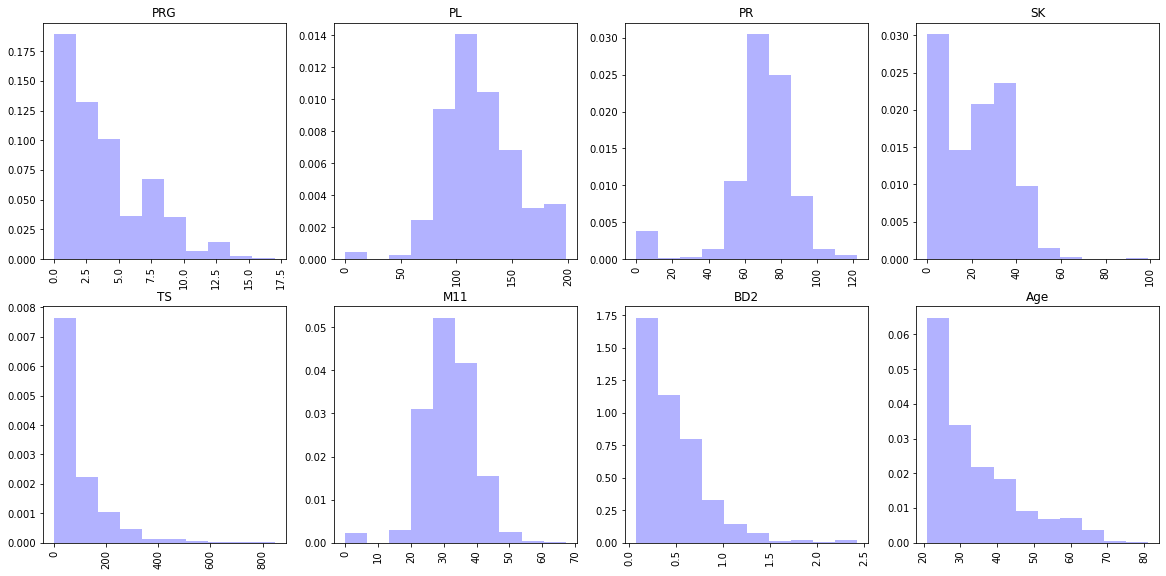

In [9]:
plt.figure(figsize=(20,20))
for i, col in enumerate(X.columns):
    plt.subplot(4,4,i+1)
    plt.hist(X[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

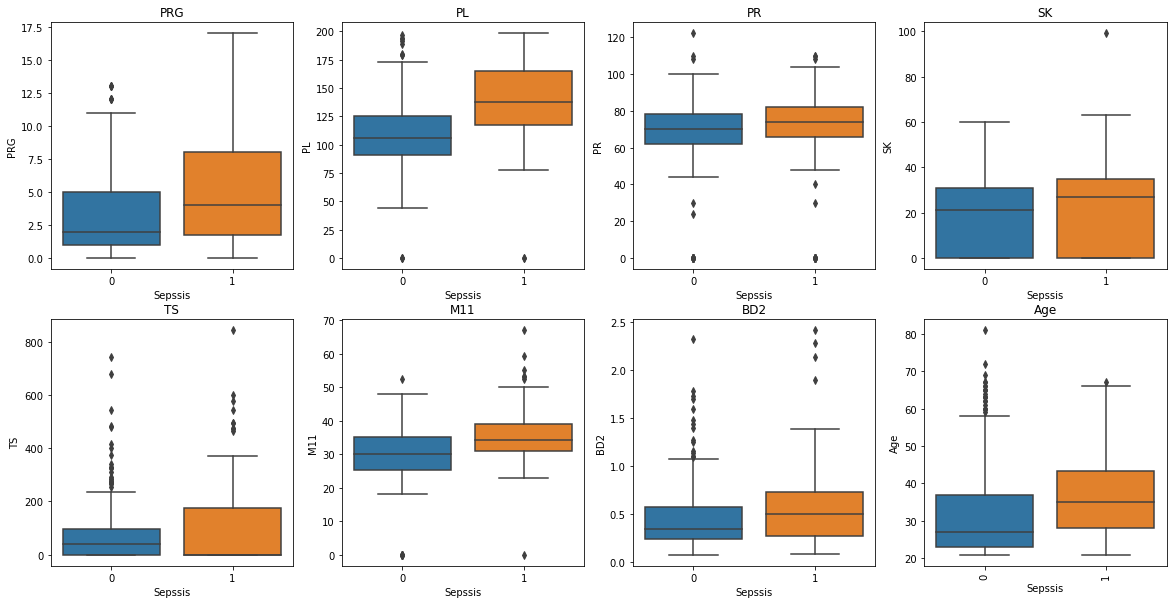

In [10]:
plt.figure(figsize=(20,10))
for i, col in enumerate(X.columns):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=Y.Sepssis, y=col, data=X)
    plt.title(col)
plt.xticks(rotation='vertical')
plt.show()

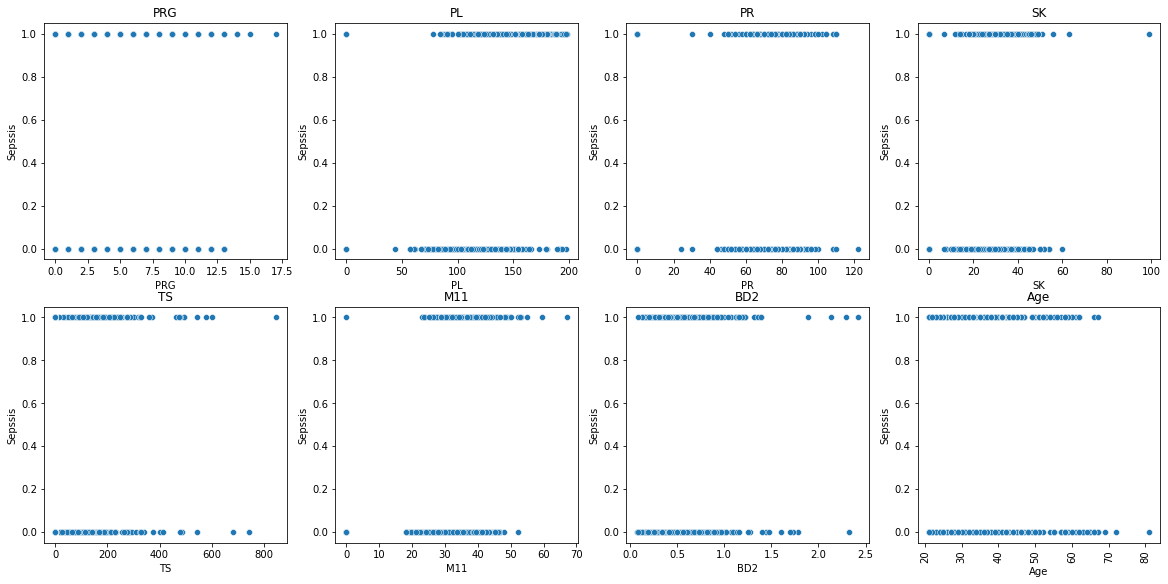

In [11]:
plt.figure(figsize=(20,20))
for i, col in enumerate(X.columns):
    plt.subplot(4,4,i+1)
    sns.scatterplot(data=X, x=col, y=Y.Sepssis)
    plt.title(col)

plt.xticks(rotation='vertical')
plt.show()

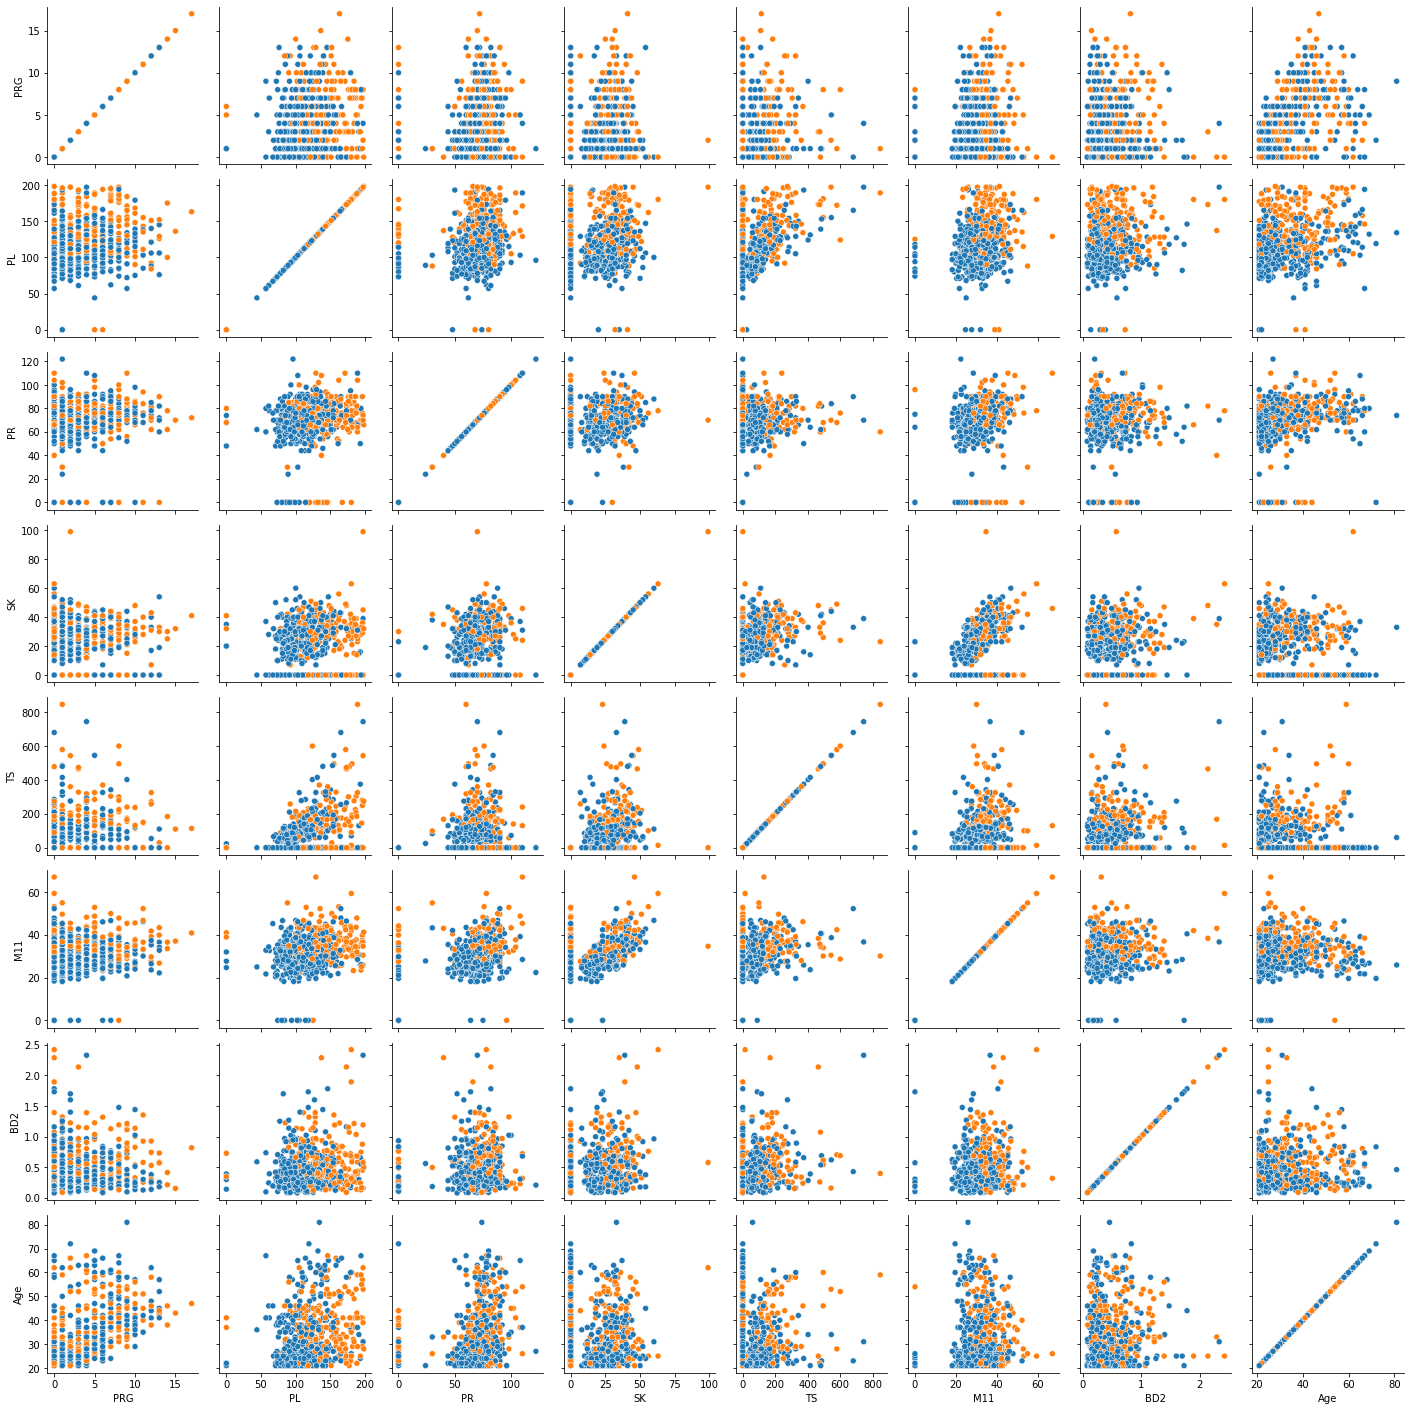

In [12]:
g = sns.PairGrid(PatientsTrainFrame, vars=['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2',
                                           'Age'], hue='Sepssis')
g.map(sns.scatterplot)
plt.show()

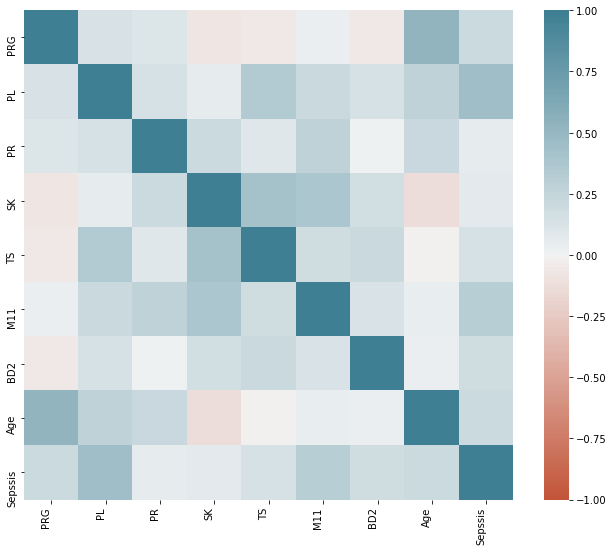

In [13]:
f, ax = plt.subplots(figsize=(11,9))
corr = PatientsTrainFrame.corr()
ax = sns.heatmap(
    data=corr,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

Given the information presented in the scatterplots, PL and M11 seem to have the most correlation with the probability of having Sepsis, afterwards PRG and PR being related with the possibility of Sepsis as well.

## Feature Scaling

### Before Scaling

In [14]:
with pd.option_context('mode.chained_assignment', None):
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25, 
                                                        shuffle=True, random_state=0)

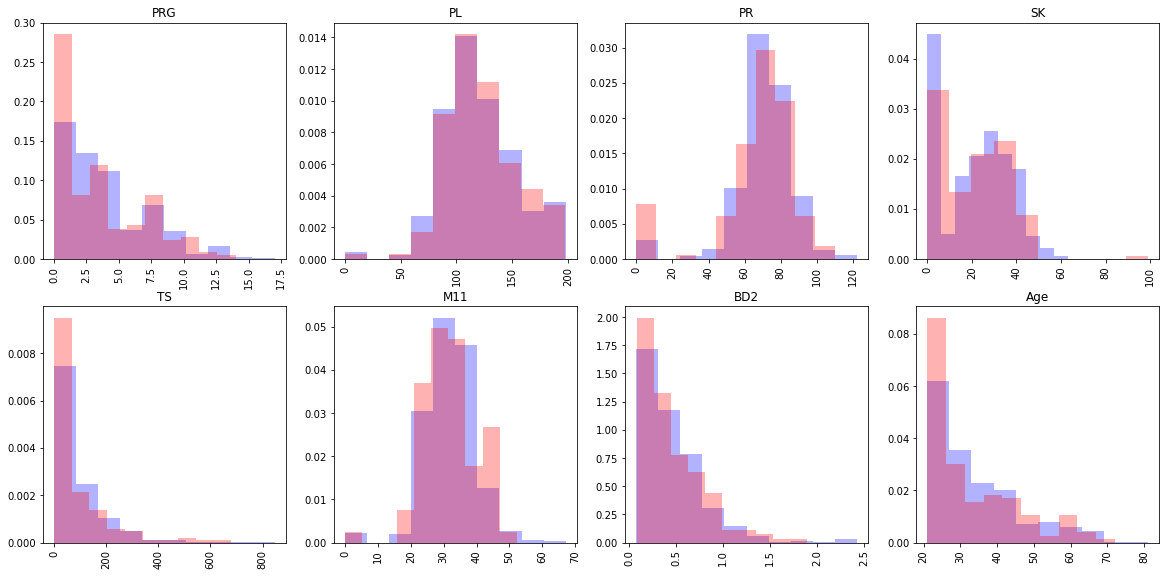

In [15]:
plt.figure(figsize=(20,20))
for i, col in enumerate(X_train.columns):
    plt.subplot(4,4,i+1)
    plt.hist(X_train[col], alpha=0.3, color='b', density=True)
    plt.hist(X_val[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

### Scaling

In [16]:
def scale(train_x, val_x):
    logNorm_attributes = ['M11', 'BD2', 'Age']
    minmax_attributes = list(set(X.columns).difference(set(logNorm_attributes)))

    train_x_scaled = train_x.copy()
    val_x_scaled = val_x.copy()

    minmaxscaler = MinMaxScaler().fit(train_x_scaled.loc[:, minmax_attributes])
    train_x_scaled.loc[:, minmax_attributes] = minmaxscaler.transform(train_x_scaled.loc[:, minmax_attributes])
    val_x_scaled.loc[:, minmax_attributes] = minmaxscaler.transform(val_x_scaled.loc[:, minmax_attributes])

    powertransformer = PowerTransformer(method='yeo-johnson', standardize=False).fit(train_x.loc[:, logNorm_attributes])
    train_x_scaled.loc[:, logNorm_attributes] = powertransformer.transform(train_x.loc[:, logNorm_attributes])
    val_x_scaled.loc[:, logNorm_attributes] = powertransformer.transform(val_x.loc[:, logNorm_attributes])

    minmaxscaler_pt = MinMaxScaler().fit(train_x_scaled.loc[:, logNorm_attributes])
    train_x_scaled.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(train_x_scaled.loc[:, logNorm_attributes])
    val_x_scaled.loc[:, logNorm_attributes] = minmaxscaler_pt.transform(val_x_scaled.loc[:, logNorm_attributes])
    
    return train_x_scaled, val_x_scaled

In [17]:
X_train_scaled, X_val_scaled = scale(X_train, X_val)
# X_train_scaled = scale(X_train, X_val)
# X_val_scaled = scale(X_train, X_val)

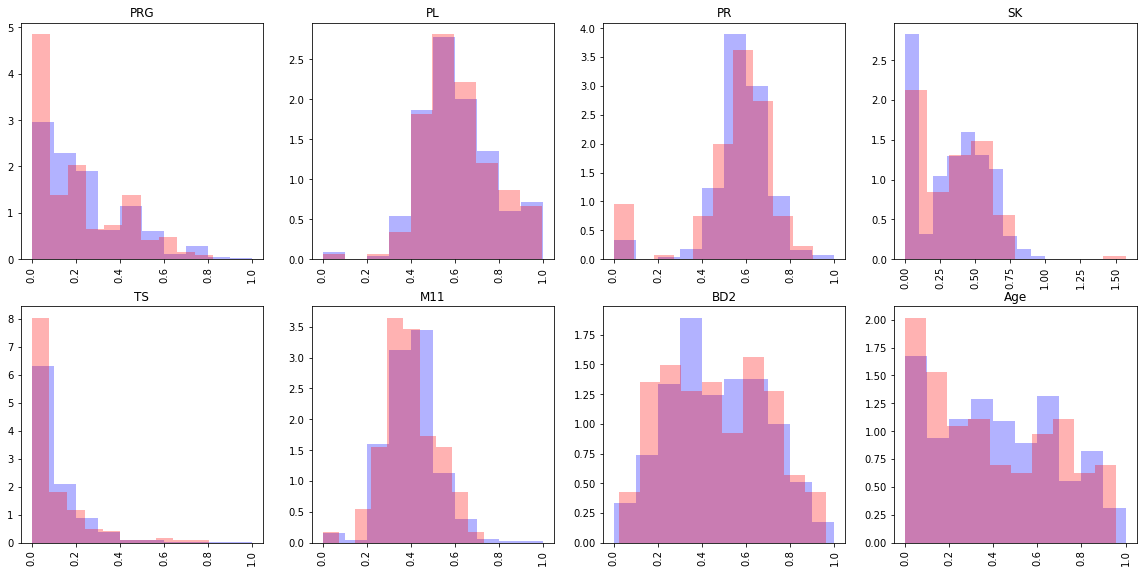

In [18]:
plt.figure(figsize=(20,20))
for i, col in enumerate(X_train_scaled.columns):
    plt.subplot(4,4,i+1)
    plt.hist(X_train_scaled[col], alpha=0.3, color='b', density=True)
    plt.hist(X_val_scaled[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

## Building the Models

Hold-out validation method

In [19]:
def pred_result(clf, train_X, train_Y, val_X, val_Y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_acc = accuracy_score(train_Y, train_pred)
    val_acc = accuracy_score(val_Y, val_pred)
    
    train_f1 = f1_score(train_Y, train_pred, average='macro')
    val_f1 = f1_score(val_Y, val_pred, average='macro')
    
    return train_acc, val_acc, train_f1, val_f1

def print_pred_results(train_acc, val_acc, train_f1, val_f1):
    print("Train Accuracy score: {:.3f}".format(train_acc))
    print("Validation Accuracy score: {:.3f}".format(val_acc))
    print("Train F1 score: {:.3f}".format(train_f1))
    print("Validation F1 score: {:.3f}".format(val_f1))

k-fold cross validation method

In [20]:
f1_scorer = make_scorer(f1_score, average='weighted')

def c_val_result(clf, train_X, train_Y):
    scores = cross_validate(clf, train_X, train_Y.to_numpy().ravel(), scoring=f1_scorer,
                           return_train_score=True, cv=10)
    return scores

def print_c_val_scores(c_val_scores):
    print("k-fold Train Score average:")
    print(sum(c_val_scores['train_score'])/len(c_val_scores['train_score']))
    print("\nk-fold Test Score average:")
    print(sum(c_val_scores['test_score'])/len(c_val_scores['test_score']))

### Baseline Models

**Linear Logistic Regression Model** (With Ridge Regularisation, default penalty is 'l2')


In [21]:
#Setup - the model will be under 'llrm'
llrm = LogisticRegression(random_state=0, penalty='l2', solver='liblinear', max_iter=1000, 
                          class_weight='balanced').fit(X_train_scaled, Y_train.to_numpy().ravel())

In [22]:
# Hold-out validation results
llrm_train_acc, llrm_val_acc, llrm_train_f1, llrm_val_f1 = pred_result(llrm, X_train_scaled.to_numpy(), 
                                                                       Y_train, X_val_scaled.to_numpy(), Y_val)

print_pred_results(llrm_train_acc, llrm_val_acc, llrm_train_f1, llrm_val_f1)

Train Accuracy score: 0.728
Validation Accuracy score: 0.753
Train F1 score: 0.716
Validation F1 score: 0.745


In [23]:
#Cross-validation results
llrm_c_val_scores = c_val_result(llrm, X_train_scaled, Y_train)
print_c_val_scores(llrm_c_val_scores)

k-fold Train Score average:
0.7393532450900191

k-fold Test Score average:
0.715798597185595


**Polynomial Logistic Regression Model (Degree 2)**

In [24]:
np_X_train_scaled = X_train_scaled.to_numpy()
np_X_val_scaled = X_val_scaled.to_numpy()

In [25]:
#Setup
poly_2 = PolynomialFeatures(2)
poly_2.fit(X_train.to_numpy())
p2_X_train_scaled = poly_2.transform(np_X_train_scaled)
p2_X_val_scaled = poly_2.transform(np_X_val_scaled)

p2rm = LogisticRegression(random_state=0, penalty='l2', solver='liblinear', max_iter=1000,
                         class_weight='balanced').fit(p2_X_train_scaled, Y_train.to_numpy().ravel())

In [26]:
# Hold-out validation results
p2rm_train_acc, p2rm_val_acc, p2rm_train_f1, p2rm_val_f1 = pred_result(p2rm, p2_X_train_scaled, 
                                                                       Y_train, p2_X_val_scaled, Y_val)
print_pred_results(p2rm_train_acc, p2rm_val_acc, p2rm_train_f1, p2rm_val_f1)

Train Accuracy score: 0.739
Validation Accuracy score: 0.753
Train F1 score: 0.722
Validation F1 score: 0.739


In [27]:
#Cross-validation results
p2rm_c_val_scores = c_val_result(p2rm, p2_X_train_scaled, Y_train)
print_c_val_scores(p2rm_c_val_scores)

k-fold Train Score average:
0.7437084928578906

k-fold Test Score average:
0.721054595843291


**Polynomial Logistic Regression Model (Degree 3)**

In [28]:
# Setup
poly_3 = PolynomialFeatures(3)
poly_3.fit(X_train.to_numpy())
p3_X_train_scaled = poly_3.transform(np_X_train_scaled)
p3_X_val_scaled = poly_3.transform(np_X_val_scaled)

p3rm = LogisticRegression(random_state=0, penalty='l2', solver='liblinear', max_iter=1000,
                         class_weight='balanced').fit(p3_X_train_scaled, Y_train.to_numpy().ravel())

In [29]:
#Hold-out validation results
p3rm_train_acc, p3rm_val_acc, p3rm_train_f1, p3rm_val_f1 = pred_result(p3rm, p3_X_train_scaled,
                                                                      Y_train, p3_X_val_scaled, Y_val)
print_pred_results(p3rm_train_acc, p3rm_val_acc, p3rm_train_f1, p3rm_val_f1)

Train Accuracy score: 0.748
Validation Accuracy score: 0.753
Train F1 score: 0.728
Validation F1 score: 0.735


In [30]:
#Cross-validation results
p3rm_c_val_scores = c_val_result(p3rm, p3_X_train_scaled, Y_train)
print_c_val_scores(p3rm_c_val_scores)

k-fold Train Score average:
0.7546608923399404

k-fold Test Score average:
0.71759225687598


### Models with regularisation

**Linear Logistic Regression Model**

With hold-out validation

In [31]:
lambda_paras_h = np.logspace(-5,1,num=200)

llrm_train_performance = list()
llrm_val_performance = list()

for lambda_para in lambda_paras_h:
    l_llrm = LogisticRegression(random_state=0, penalty='l2', C=1.0/lambda_para, solver='liblinear', max_iter=1000, 
                                class_weight='balanced').fit(X_train_scaled, Y_train.to_numpy().ravel())
    
    l_llrm_train_acc, l_llrm_val_acc, l_llrm_train_f1, l_llrm_val_f1 = pred_result(l_llrm, X_train_scaled.to_numpy(), 
                                                                                   Y_train, X_val_scaled.to_numpy(), Y_val)
    
    llrm_train_performance.append(l_llrm_train_f1)
    llrm_val_performance.append(l_llrm_val_f1)
    

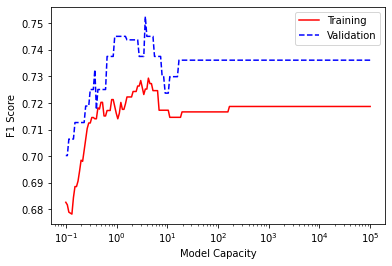

In [32]:
plt.plot([1.0/lambda_para for lambda_para in lambda_paras_h],
        [tp for tp in llrm_train_performance], '-r')
plt.plot([1.0/lambda_para for lambda_para in lambda_paras_h],
        [vp for vp in llrm_val_performance], 'b--')
plt.xscale("log")
plt.ylabel('F1 Score')
plt.xlabel('Model Capacity')
plt.legend(['Training', 'Validation'])
plt.show()

With k-fold validation

In [33]:
lambda_paras_cv = np.logspace(-10, 2, num=25)

cv_lllrm_results = dict()

for lambda_para in lambda_paras_cv:
    cv_lllrm = LogisticRegression(penalty='l2', C=1.0/lambda_para, random_state=0, 
                                solver='liblinear', max_iter=1000, class_weight='balanced')
    
    cv_lllrm_scores = cross_validate(cv_lllrm, X_train_scaled, Y_train.to_numpy().ravel(),
                                     scoring=f1_scorer, return_estimator=True, 
                                     return_train_score=True, cv=10)
    
    cv_lllrm_results[lambda_para] = cv_lllrm_scores

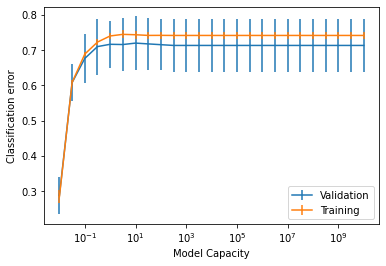

In [34]:
fig, ax = plt.subplots()

lllrm_val_means = [np.mean(cv_lllrm_results[lambda_para]['test_score'])
                   for lambda_para in lambda_paras_cv]

lllrm_val_std = [np.std(cv_lllrm_results[lambda_para]['test_score'])
                 for lambda_para in lambda_paras_cv]

lllrm_train_means = [np.mean(cv_lllrm_results[lambda_para]['train_score'])
                     for lambda_para in lambda_paras_cv]

lllrm_train_std = [np.std(cv_lllrm_results[lambda_para]['train_score'])
                   for lambda_para in lambda_paras_cv]

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras_cv],
            lllrm_val_means, yerr=lllrm_val_std)

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras_cv],
            lllrm_train_means, yerr=lllrm_train_std)

plt.xscale("log")
plt.ylabel('Classification error')
plt.xlabel('Model Capacity')
plt.legend(['Validation', 'Training',])
plt.show()

**Polynomial Logistic Regression Model (Degree 2)**

With hold-out validation

In [35]:
lambda_paras_h = np.logspace(-5,1,num=200)

train_performance = list()
val_performance = list()

for lambda_para in lambda_paras_h:
    l_p2rm = LogisticRegression(penalty='l2', C=1.0/lambda_para, random_state=0, solver='liblinear', max_iter=1000, 
                                class_weight='balanced').fit(p2_X_train_scaled, Y_train.to_numpy().ravel())
    
    l_p2rm_train_acc, l_p2rm_val_acc, l_p2rm_train_f1, l_p2rm_val_f1 = pred_result(l_p2rm, p2_X_train_scaled, 
                                                                       Y_train, p2_X_val_scaled, Y_val)
    
    train_performance.append(l_p2rm_train_f1)
    val_performance.append(l_p2rm_val_f1)

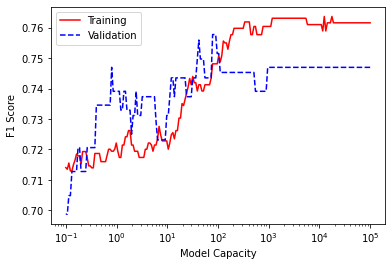

In [36]:
plt.plot([1.0/lambda_para for lambda_para in lambda_paras_h],
        [tp for tp in train_performance], '-r')
plt.plot([1.0/lambda_para for lambda_para in lambda_paras_h],
        [vp for vp in val_performance], 'b--')
plt.xscale("log")
plt.ylabel('F1 Score')
plt.xlabel('Model Capacity')
plt.legend(['Training', 'Validation'])
plt.show()

In [37]:
l_p2rm = LogisticRegression(penalty='l2', C=109, random_state=0, solver='liblinear', max_iter=1000, 
                                class_weight='balanced').fit(p2_X_train_scaled, Y_train.to_numpy().ravel())

l_p2rm_train_acc, l_p2rm_val_acc, l_p2rm_train_f1, l_p2rm_val_f1 = pred_result(l_p2rm, p2_X_train_scaled, 
                                                                               Y_train, p2_X_val_scaled, Y_val)

print("Train F1 score: {:.3f}".format(l_p2rm_train_f1))
print("Validation F1 score: {:.3f}".format(l_p2rm_val_f1))

Train F1 score: 0.749
Validation F1 score: 0.745


With k-fold validation

In [38]:
lambda_paras_cv = np.logspace(-10, 2, num=25)

cv_lp2_results = dict()

for lambda_para in lambda_paras_cv:
    cv_lp2 = LogisticRegression(penalty='l2', C=1.0/lambda_para, random_state=0, 
                                solver='liblinear', max_iter=1000, class_weight='balanced')
    
    cv_lp2_scores = cross_validate(cv_lp2, p2_X_train_scaled, Y_train.to_numpy().ravel(),
                                  scoring=f1_scorer, return_estimator=True, 
                                   return_train_score=True, cv=10)
    cv_lp2_results[lambda_para] = cv_lp2_scores

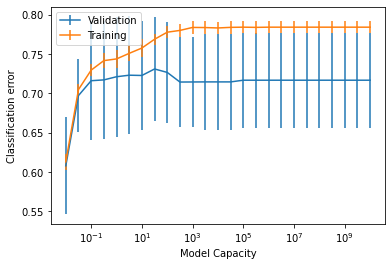

In [39]:
fig, ax = plt.subplots()

val_means = [np.mean(cv_lp2_results[lambda_para]['test_score'])
            for lambda_para in lambda_paras_cv]

val_std = [np.std(cv_lp2_results[lambda_para]['test_score'])
          for lambda_para in lambda_paras_cv]

train_means = [np.mean(cv_lp2_results[lambda_para]['train_score'])
               for lambda_para in lambda_paras_cv]

train_std = [np.std(cv_lp2_results[lambda_para]['train_score'])
             for lambda_para in lambda_paras_cv]

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras_cv],
           val_means, yerr=val_std)

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras_cv],
           train_means, yerr=train_std)

plt.xscale("log")
plt.ylabel('Classification error')
plt.xlabel('Model Capacity')
plt.legend(['Validation', 'Training',])
plt.show()

**Polynomial Logistic Regression Model (Degree 3)**

With hold-out validation

In [40]:
lambda_paras_h = np.logspace(-5,1,num=200)

l_p3_train_performance = list()
l_p3_val_performance = list()

for lambda_para in lambda_paras_h:
    l_p3rm = LogisticRegression(random_state=0, C=1.0/lambda_para, penalty='l2', solver='liblinear', max_iter=1000,
                                class_weight='balanced').fit(p3_X_train_scaled, Y_train.to_numpy().ravel())
    
    l_p3rm_train_acc, l_p3rm_val_acc, l_p3rm_train_f1, l_p3rm_val_f1 = pred_result(l_p3rm, p3_X_train_scaled,
                                                                                   Y_train, p3_X_val_scaled, Y_val)
    
    l_p3_train_performance.append(l_p3rm_train_f1)
    l_p3_val_performance.append(l_p3rm_val_f1)

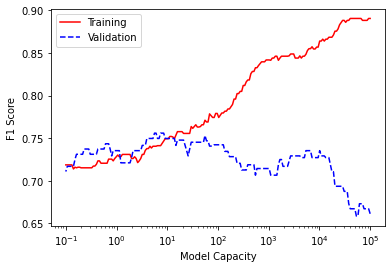

In [41]:
plt.plot([1.0/lambda_para for lambda_para in lambda_paras_h],
        [tp for tp in l_p3_train_performance], '-r')
plt.plot([1.0/lambda_para for lambda_para in lambda_paras_h],
        [vp for vp in l_p3_val_performance], 'b--')
plt.xscale("log")
plt.ylabel('F1 Score')
plt.xlabel('Model Capacity')
plt.legend(['Training', 'Validation'])
plt.show()

In [42]:
l_p3rm = LogisticRegression(random_state=0, C=55, penalty='l2', solver='liblinear', max_iter=1000,
                            class_weight='balanced').fit(p3_X_train_scaled, Y_train.to_numpy().ravel())

l_p3rm_train_acc, l_p3rm_val_acc, l_p3rm_train_f1, l_p3rm_val_f1 = pred_result(l_p3rm, p3_X_train_scaled,
                                                                               Y_train, p3_X_val_scaled, Y_val)

print("Train F1 score: {:.3f}".format(l_p3rm_train_f1))
print("Validation F1 score: {:.3f}".format(l_p3rm_val_f1))

Train F1 score: 0.771
Validation F1 score: 0.753


With k-fold validation

In [43]:
lambda_paras_cv = np.logspace(-10, 2, num=25)

cv_lp3_results = dict()

for lambda_para in lambda_paras_cv:
    cv_lp3 = LogisticRegression(penalty='l2', C=1.0/lambda_para, random_state=0,
                               solver='liblinear', max_iter=1000, class_weight='balanced')
    
    cv_lp3_scores = cross_validate(cv_lp3, p3_X_train_scaled, Y_train.to_numpy().ravel(),
                                  scoring=f1_scorer, return_estimator=True,
                                  return_train_score=True, cv=10)
    
    cv_lp3_results[lambda_para] = cv_lp3_scores

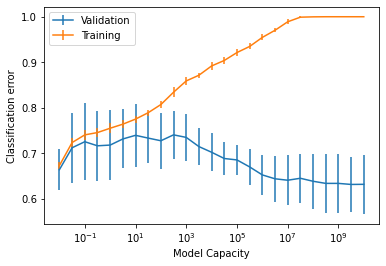

In [44]:
fig, ax = plt.subplots()

lp3_val_means = [np.mean(cv_lp3_results[lambda_para]['test_score'])
            for lambda_para in lambda_paras_cv]

lp3_val_std = [np.std(cv_lp3_results[lambda_para]['test_score'])
          for lambda_para in lambda_paras_cv]

lp3_train_means = [np.mean(cv_lp3_results[lambda_para]['train_score'])
               for lambda_para in lambda_paras_cv]

lp3_train_std = [np.std(cv_lp3_results[lambda_para]['train_score'])
             for lambda_para in lambda_paras_cv]

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras_cv],
           lp3_val_means, yerr=lp3_val_std)

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras_cv],
           lp3_train_means, yerr=lp3_train_std)

plt.xscale("log")
plt.ylabel('Classification error')
plt.xlabel('Model Capacity')
plt.legend(['Validation', 'Training',])
plt.show()

### Retrieving Final Results

In [45]:
# val Mean result of 7th point in polynomial 2 k-fold results chart
print(val_means[-8])

0.7309209951990077


In [46]:
# val Mean result of 8th point in polynomial 3 k-fold results chart
print(lp3_val_means[-7])

0.7390542531726483
